In [1]:
import numpy as np
import pandas as pd

Загрузим данные о центрах групп галактик.

In [2]:
grlist_2 = pd.read_csv('grlist_2.tsv', sep='\t', comment='#')[1:]

In [3]:
grlist_2 = grlist_2[grlist_2['iGrID'] != '--------']

In [4]:
grlist_s = pd.read_csv('grlist_s.tsv', sep='\t', comment='#')[1:]

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
grlist_s = grlist_s[grlist_s['iGrID'] != '--------']
#grlist = pd.concat([grlist_2, grlist_s], ignore_index=True)

После загрузки оставим только те группы, в которых обнаружено более 30 галактик.

In [6]:
grlist_2 = grlist_2[pd.to_numeric(grlist_2['Ntot']) > 30]
grlist_s = grlist_s[pd.to_numeric(grlist_s['Ntot']) > 30]

In [7]:
grlist_2['iGrID'] = pd.to_numeric(grlist_2['iGrID'])
grlist_2 = grlist_2.sort_values(by='iGrID')
grlist_s['iGrID'] = pd.to_numeric(grlist_s['iGrID'])
grlist_s = grlist_s.sort_values(by='iGrID')
#grlist.to_csv('grlist.csv', index=False)

Загрузим данные о самих галактиках.

In [8]:
galist_2 = pd.read_csv('galist_2.tsv', sep='\t', comment='#')[1:]

In [9]:
galist_2 = galist_2[galist_2['iGrID'] != '--------']

In [10]:
galist_s = pd.read_csv('galist_s.tsv', sep='\t', comment='#')[1:]

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
galist_s = galist_s[galist_s['iGrID'] != '--------']
#galist = pd.concat([galist_2, galist_s], ignore_index=True)

#galist_2 = galist_2[~np.isnan(pd.to_numeric(galist_2['logMstar']))]
#galist_s = galist_s[~np.isnan(pd.to_numeric(galist_s['logMstar']))]

In [12]:
galist_2['iGrID'] = pd.to_numeric(galist_2['iGrID'])
galist_2 = galist_2.sort_values(by='iGrID')
galist_s['iGrID'] = pd.to_numeric(galist_s['iGrID'])
galist_s = galist_s.sort_values(by='iGrID')

Оставим только те галактики, которые входят в ранее отфильтрованные по количеству группы.

In [13]:
galist_2 = galist_2[galist_2['iGrID'].isin(grlist_2['iGrID'])]
galist_s = galist_s[galist_s['iGrID'].isin(grlist_s['iGrID'])]

Сохраним полученные данные.

In [14]:
grlist_2.to_csv('grlist_2_flt.csv', index=False)
grlist_s.to_csv('grlist_s_flt.csv', index=False)
galist_2.to_csv('galist_2_flt.csv', index=False)
galist_s.to_csv('galist_s_flt.csv', index=False)

Совместим данные о центрах с данными о галактиках.

In [15]:
glist_2 = pd.merge(galist_2, grlist_2, on='iGrID', how='left', suffixes=('_gal', '_group'))
glist_s = pd.merge(galist_s, grlist_s, on='iGrID', how='left', suffixes=('_gal', '_group'))

In [16]:
glist_2.to_csv('glist_2.csv', index=False)
glist_s.to_csv('glist_s.csv', index=False)

Посмотрим как данные галактики отображаются на небе с помощью Topcat.

In [17]:
from IPython.display import Image

Данные 2MRS

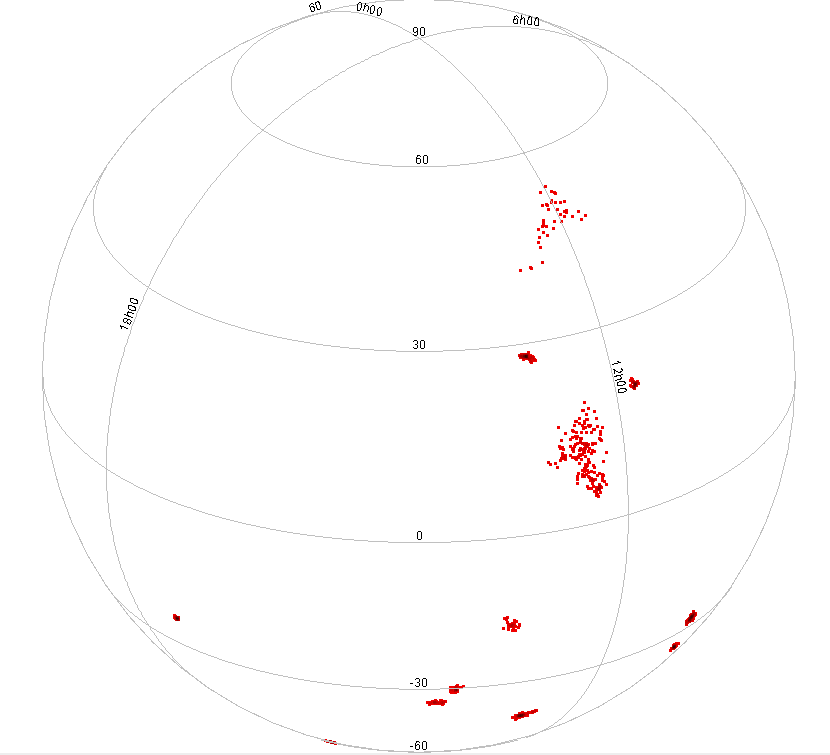

In [18]:
Image('glist2.png')

Данные SDSS DR12

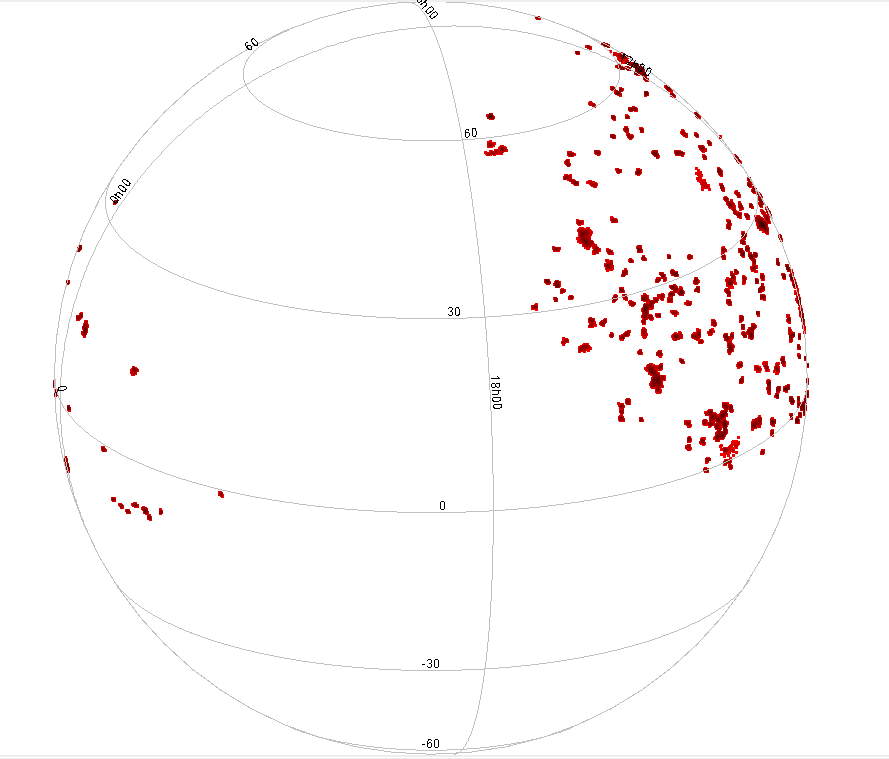

In [19]:
Image('glist_s.png')

Посмотрим  на зависимость между угловым расстоянием от центра группы галактик до галактик из этой группы и разностью  красного смещения галактики и красного смещения центра для разных групп галактик.

In [20]:
import matplotlib.pyplot as plt

def plot(ID, g_list):
    example = g_list[g_list['iGrID']==ID]
    ra_gal = pd.to_numeric(example['RAJ2000_gal']).values
    dec_gal = pd.to_numeric(example['DEJ2000_gal']).values
    ra_gr = pd.to_numeric(example['RAJ2000_group']).values
    dec_gr =pd.to_numeric(example['DEJ2000_group']).values
    # считаем угловое расстояние между галактикой и центром по прямому восхождению и склонению
    ang_dst = np.degrees(np.arccos(np.sin(np.radians(dec_gal)) * np.sin(np.radians(dec_gr))
                                 + np.cos(np.radians(dec_gal)) * np.cos(np.radians(dec_gr)) *
                                 np.cos(np.radians(ra_gal) - np.radians(ra_gr))))
    z_gal = pd.to_numeric(example['z_gal']).values
    z_gr = pd.to_numeric(example['z_group']).values
    z_dif = z_gal - z_gr
    fig, ax = plt.subplots()
    plt.scatter(ang_dst, z_dif)
    plt.xlabel('Angular Distance from center')
    plt.ylabel('Redshift Difference')
    y_lim = np.max(abs(z_dif))
    plt.ylim([-y_lim, y_lim])
    plt.title('iGrID=' + str(ID))
    plt.show()

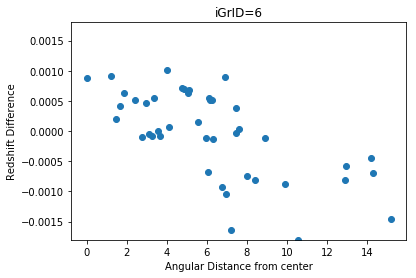

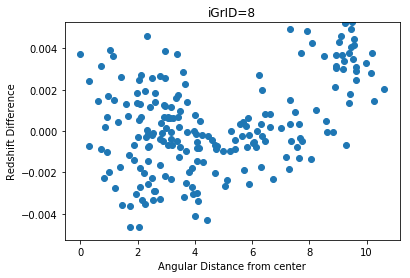

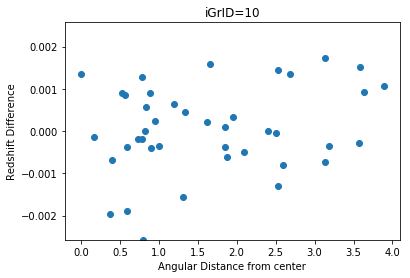

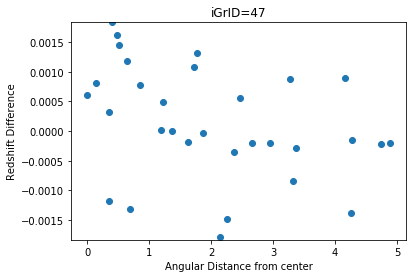

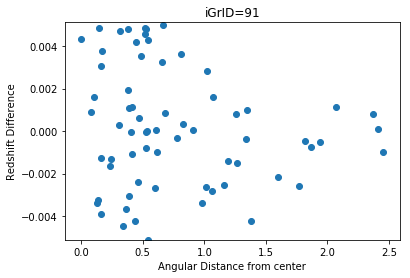

In [21]:
GrIDs_2 = glist_2['iGrID'].unique()
for i in GrIDs_2[:np.min([5, len(GrIDs_2)])]:
    plot(i, glist_2)

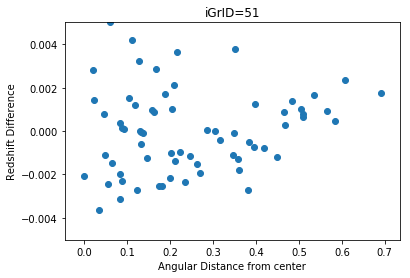

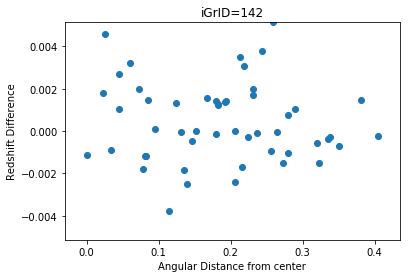

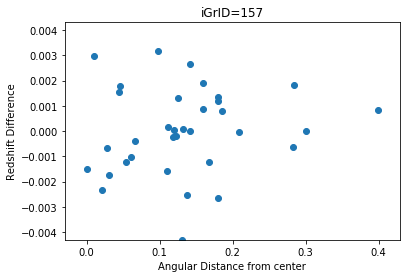

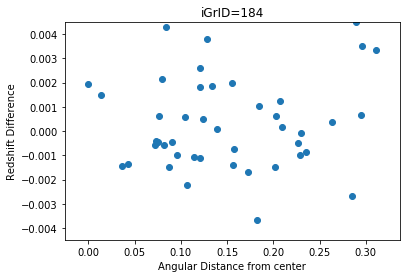

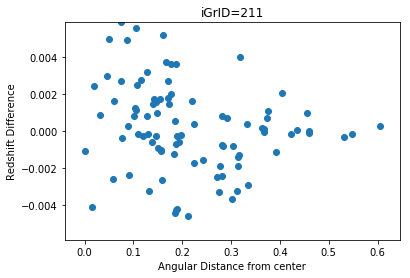

In [22]:
GrIDs_s = glist_s['iGrID'].unique()
for i in GrIDs_s[:np.min([5, len(GrIDs_s)])]:
    plot(i, glist_s)